In [1]:
pip install alpha_vantage

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [1]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# API key from Alpha Vantage
api_key = "API KEY"  
ts = TimeSeries(key=api_key, output_format="pandas")

data, meta_data = ts.get_daily(symbol="AAPL", outputsize="full")

data.index = pd.to_datetime(data.index)

data = data.sort_index()

start_date = "2024-01-01"
end_date = "2024-07-01"

stock_data = data.loc[start_date:end_date]

In [ ]:
# Alternative 

In [96]:
import yfinance as yf 
stock_data= yf.download('AAPL', start = '2024-01-01', end = '2024-07-01')

In [3]:
stock_data

,1. open,2. high,3. low,4. close,5. volume
date,,,,,
2024-01-02,187.150,188.4400,183.885,185.64,82488674.0
2024-01-03,184.220,185.8800,183.430,184.25,58414460.0
2024-01-04,182.150,183.0872,180.880,181.91,71983570.0
2024-01-05,181.990,182.7600,180.170,181.18,62196924.0
2024-01-08,182.085,185.6000,181.500,185.56,59144470.0
...,...,...,...,...,...
2024-06-25,209.150,211.3800,208.610,209.07,56713868.0
2024-06-26,211.500,214.8600,210.640,213.25,66213186.0
2024-06-27,214.690,215.7395,212.350,214.10,49772707.0


In [4]:
stock_data.columns

Index(['1. open', '2. high', '3. low', '4. close', '5. volume'], dtype='object')

In [5]:
# Renaming columns
stock_data.rename(columns={'1. open': 'Open',
                           '2. high': 'High',
                           '3. low': 'Low',
                           '4. close': 'Close',
                           '5. volume': 'Volume'}, inplace=True)

print(stock_data.columns)  


Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [6]:
stock_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')

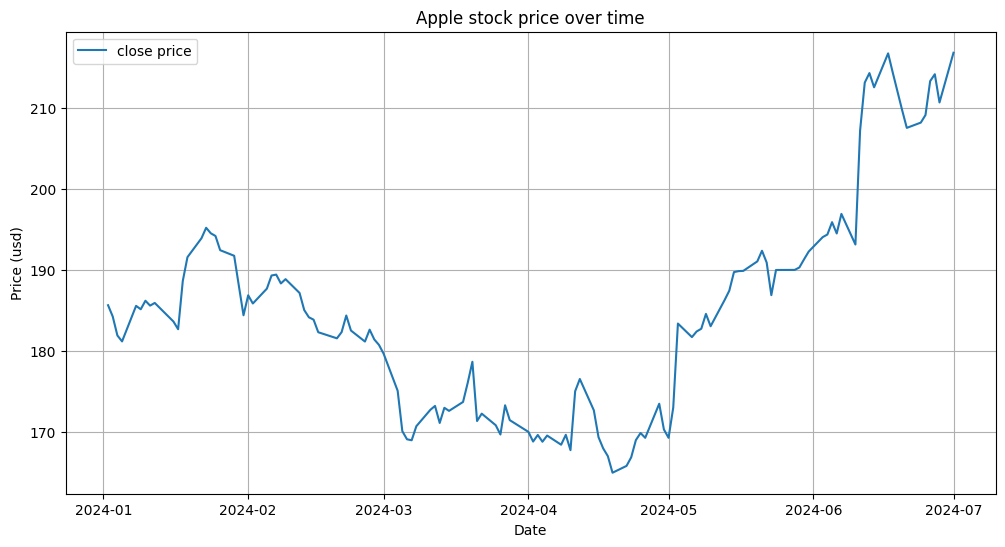

In [7]:
# plotting the data
plt.figure(figsize =(12,6))
plt.plot(stock_data.index,stock_data['Close'],label = 'close price')
plt.title('Apple stock price over time')
plt.xlabel('Date')
plt.ylabel('Price (usd)')
plt.legend()
plt.grid(True)
plt.show()

### Classical time series decomposition

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(stock_data['Close'], model='additive', period=30) # our data is additive because the seasonal variation is not multiplying w.r.t trend

In [9]:
trend_additive = result.trend
seasonal_additive = result.seasonal
residual_additive = result.resid

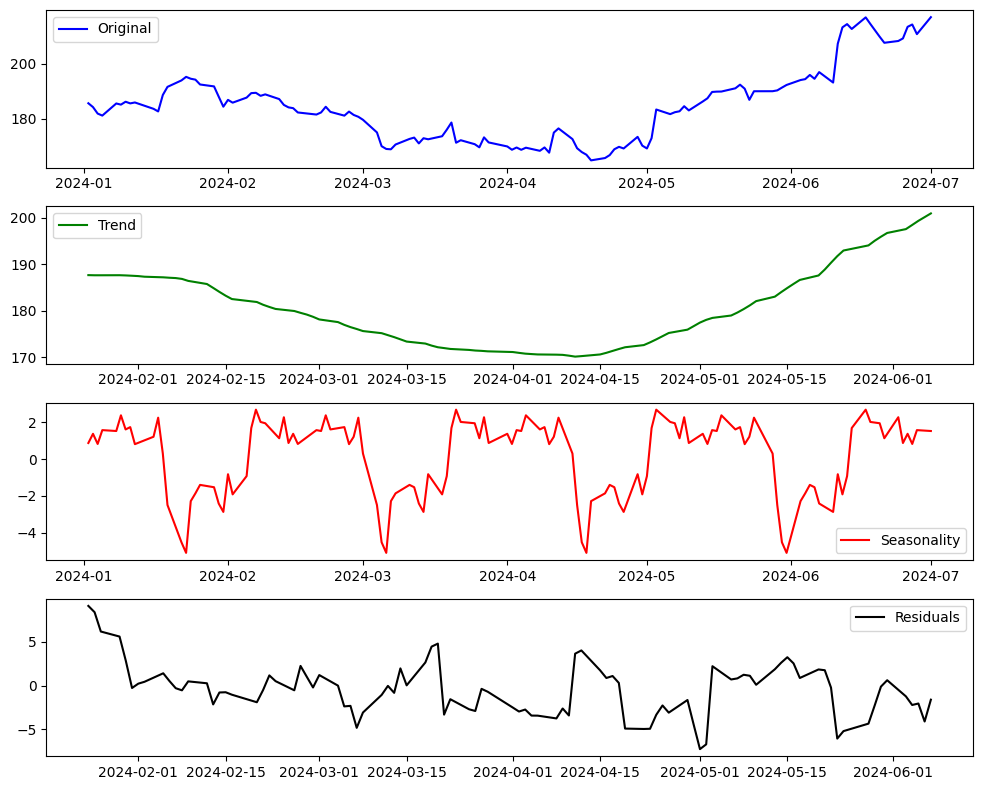

In [10]:
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color='blue')
plt.legend()

plt.subplot(412)
plt.plot(trend_additive, label='Trend', color='green')
plt.legend()

plt.subplot(413)
plt.plot(seasonal_additive, label='Seasonality', color='red')
plt.legend()

plt.subplot(414)
plt.plot(residual_additive, label='Residuals', color='black')
plt.legend()

plt.tight_layout()
plt.show()

In [11]:
# Fixed seasonality variations 

### STL Decomposition 

In [12]:
from statsmodels.tsa.seasonal import STL

In [13]:
stl = STL(stock_data['Close'], period = 30) 
result = stl.fit()

In [14]:
trend = result.trend
seasonal = result.seasonal
residual = result.resid

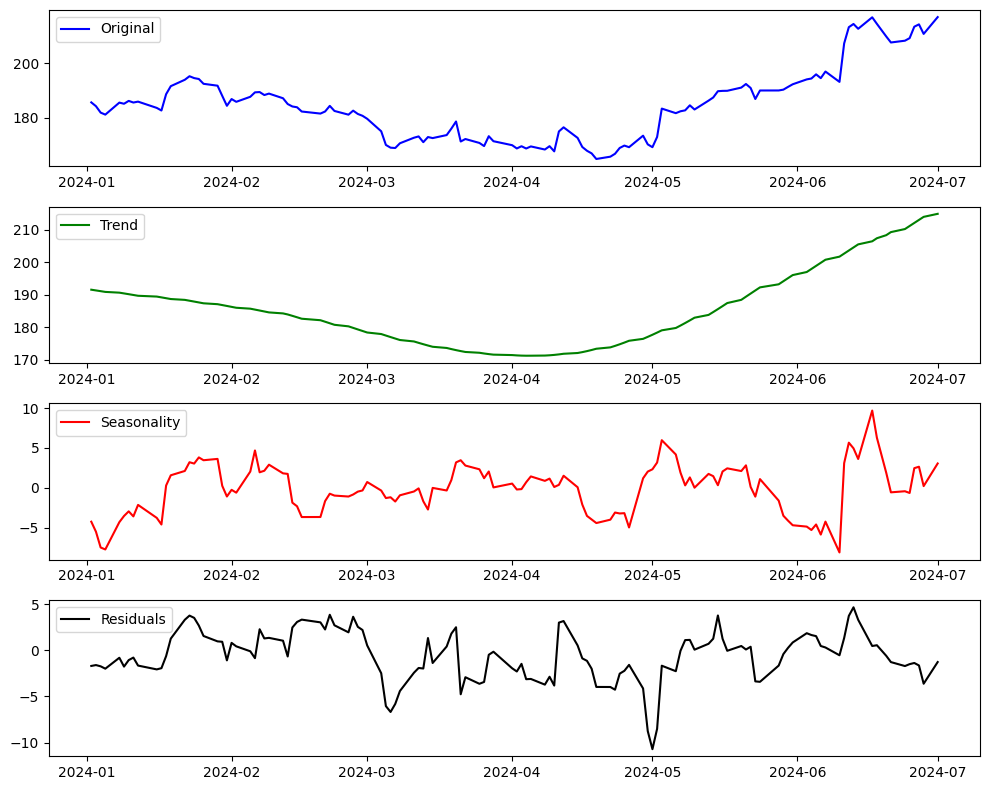

In [15]:
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(stock_data['Close'], label='Original', color='blue')
plt.legend()

plt.subplot(412)
plt.plot(trend, label='Trend', color='green')
plt.legend()

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='red')
plt.legend()

plt.subplot(414)
plt.plot(residual, label='Residuals', color='black')
plt.legend()

plt.tight_layout()
plt.show()


In [16]:
# Not fixed Seasonality variations

### Smoothing Techniques 

In [17]:
# 1. Moving AVerage 

In [18]:
# Simple Moving Average 

In [19]:
prices = stock_data['Close']

In [20]:
window_size = 20
stock_data['SMA'] = prices.rolling(window=window_size).mean()

In [21]:
# Weighted Moving Average 

In [22]:
weights = np.arange(1, window_size +1)
stock_data['WMA'] = prices.rolling(window_size).apply(lambda x: np.dot(x, weights) / sum(weights), raw=True)

In [23]:
# Exponential Moving average 

In [24]:
stock_data['EMA'] = prices.ewm(span = window_size).mean()

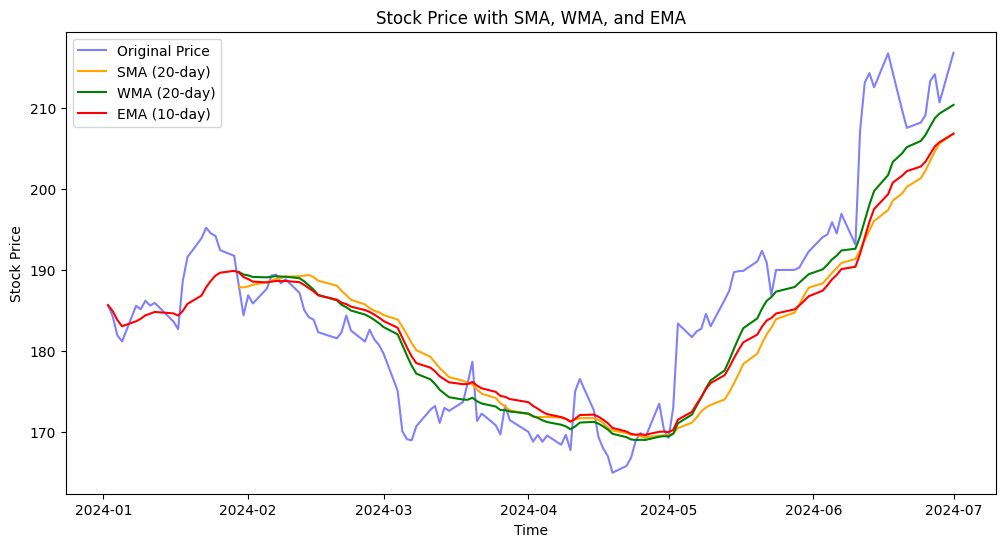

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(prices, label="Original Price", color="blue", alpha=0.5)
plt.plot(stock_data['SMA'], label="SMA (20-day)", color="orange")
plt.plot(stock_data['WMA'], label="WMA (20-day)", color="green")
plt.plot(stock_data['EMA'], label="EMA (10-day)", color="red")

plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price with SMA, WMA, and EMA")
plt.legend()
plt.show()

In [26]:
# 2. Exponential Smoothing 

In [27]:
# Single Exponential Smoothing

In [29]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing

stock_data['SES'] = SimpleExpSmoothing(prices).fit(smoothing_level=0.7).fittedvalues

In [30]:
# Double Exponential Smoothing

In [32]:
stock_data['DES'] = ExponentialSmoothing(prices, trend="add").fit(smoothing_level=0.7, smoothing_trend=0.3).fittedvalues

In [33]:
# Triple Exponential Smoothing

In [35]:
stock_data['TES'] = ExponentialSmoothing(prices, trend="add", seasonal="multiplicative", seasonal_periods=12).fit(smoothing_level=0.7, smoothing_trend=0.3, smoothing_seasonal=0.2).fittedvalues

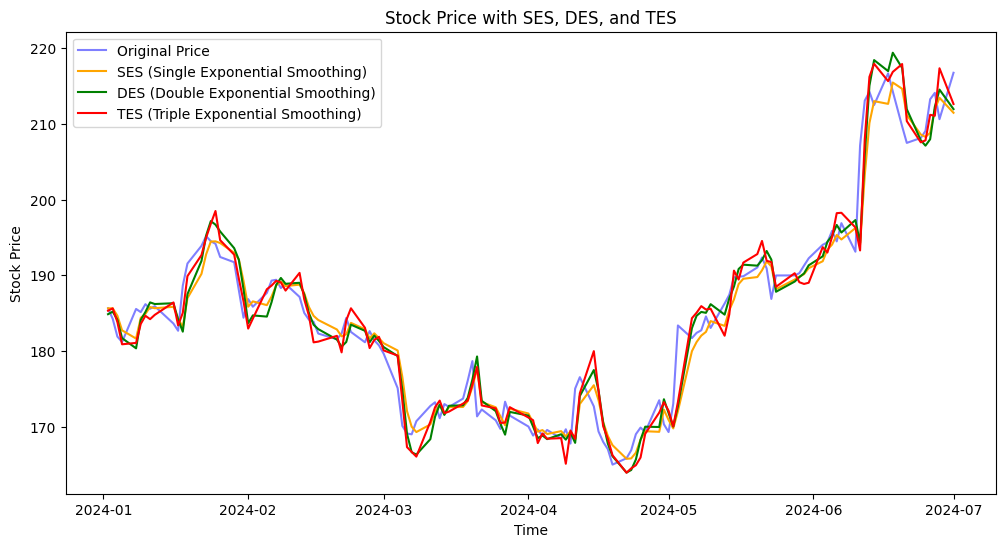

In [36]:
plt.figure(figsize=(12, 6))
plt.plot(prices, label="Original Price", color="blue", alpha=0.5)
plt.plot(stock_data['SES'], label="SES (Single Exponential Smoothing)", color="orange")
plt.plot(stock_data['DES'], label="DES (Double Exponential Smoothing)", color="green")
plt.plot(stock_data['TES'], label="TES (Triple Exponential Smoothing)", color="red")

plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.title("Stock Price with SES, DES, and TES")
plt.legend()
plt.show()

### Checking Stationarity 

In [38]:
from statsmodels.tsa.stattools import adfuller, kpss
from scipy.stats import ks_2samp
import numpy as np

close_prices = stock_data['Close'] 

# ADF Test (Tests for stationarity)
def adf_test(series):
    result = adfuller(series)
    print("ADF Test Results:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] < 0.05:
        print("Reject the null hypothesis (Data is stationary)")
    else:
        print("Fail to reject the null hypothesis (Data is non-stationary)")
    print("\n")

# KPSS Test (Tests for trend stationarity)
def kpss_test(series):
    result = kpss(series, regression='ct', nlags="auto")  # c is for constant stationarity ct is for trend stationarity
    print("KPSS Test Results:")
    print(f"KPSS Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[3]}")
    if result[1] < 0.05:
        print("Reject the null hypothesis (Data is non-Stationary)")
    else:
        print("Fail to reject the null hypothesis (Data is trend stationary)")
    print("\n")

# KS Test (Compare with a normal distribution)
def ks_test(series):
    normal_data = np.random.normal(series.mean(), series.std(), len(series))
    result = ks_2samp(series, normal_data)
    print("KS Test Results:")
    print(f"KS Statistic: {result.statistic}")
    print(f"p-value: {result.pvalue}")
    if result.pvalue < 0.05:
        print("Reject the null hypothesis (Distributions are different)")
    else:
        print("Fail to reject the null hypothesis (Distributions are similar)")
    print("\n")

adf_test(close_prices)
kpss_test(close_prices)
ks_test(close_prices)

ADF Test Results:
ADF Statistic: 0.06492416134472864
p-value: 0.9635830842191807
Critical Values: {'1%': -3.484219653271961, '5%': -2.885145235641637, '10%': -2.579359138917794}
Fail to reject the null hypothesis (Data is non-stationary)


KPSS Test Results:
KPSS Statistic: 0.4292915346222734
p-value: 0.01
Critical Values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}
Reject the null hypothesis (Data is non-Stationary)


KS Test Results:
KS Statistic: 0.112
p-value: 0.41450411415602784
Fail to reject the null hypothesis (Distributions are similar)




In [39]:
# Since our data is non stationary we have to make it stationary 

In [40]:
# ADF Test (Tests for stationarity)
def adf_test(series):
    result = adfuller(series)
    print("ADF Test Results:")
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print(f"Critical Values: {result[4]}")
    if result[1] < 0.05:
        print("Reject the null hypothesis (Data is stationary)")
    else:
        print("Fail to reject the null hypothesis (Data is non-stationary)")
    print("\n")

In [41]:
prices = stock_data['Close']  

In [42]:
adf_test(prices)  # we can see the data is non stationary 

ADF Test Results:
ADF Statistic: 0.06492416134472864
p-value: 0.9635830842191807
Critical Values: {'1%': -3.484219653271961, '5%': -2.885145235641637, '10%': -2.579359138917794}
Fail to reject the null hypothesis (Data is non-stationary)




In [43]:
# Differencing 

In [44]:
df1 = prices.diff()  # 1st order differencing

In [45]:
df2 = prices.diff().diff()  # 2nd order differencing

In [46]:
adf_test(df1.dropna())

ADF Test Results:
ADF Statistic: -10.286143329088311
p-value: 3.670660913143856e-18
Critical Values: {'1%': -3.4846672514209773, '5%': -2.8853397507076006, '10%': -2.5794629869786503}
Reject the null hypothesis (Data is stationary)




In [47]:
adf_test(df2.dropna())

ADF Test Results:
ADF Statistic: -4.812549496637291
p-value: 5.1458028475057254e-05
Critical Values: {'1%': -3.49181775886872, '5%': -2.8884437992971588, '10%': -2.5811201893779985}
Reject the null hypothesis (Data is stationary)




In [48]:
# Transformation 

In [49]:
from scipy.stats import boxcox

# using log transformation
log = np.log(prices)

# using sqrt transformation 
sqrt = np.sqrt(prices)

# Box-Cox Transformation (requires positive values)
boxcox, lambda_value = boxcox(prices)  # Unpacking the tuple

In [50]:
adf_test(log)

ADF Test Results:
ADF Statistic: -0.07222998050407335
p-value: 0.9521352447851885
Critical Values: {'1%': -3.484219653271961, '5%': -2.885145235641637, '10%': -2.579359138917794}
Fail to reject the null hypothesis (Data is non-stationary)




In [51]:
adf_test(sqrt)

ADF Test Results:
ADF Statistic: -0.003001511071250822
p-value: 0.9582831581883793
Critical Values: {'1%': -3.484219653271961, '5%': -2.885145235641637, '10%': -2.579359138917794}
Fail to reject the null hypothesis (Data is non-stationary)




In [52]:
adf_test(boxcox)

ADF Test Results:
ADF Statistic: -0.5799905401597203
p-value: 0.8754395485139267
Critical Values: {'1%': -3.484219653271961, '5%': -2.885145235641637, '10%': -2.579359138917794}
Fail to reject the null hypothesis (Data is non-stationary)




In [53]:
# De Trending 

In [54]:
# using linear detrending
from scipy import signal 

trend = np.polyfit(np.arange(len(prices)), prices, 1)
trendline = np.polyval(trend, np.arange(len(prices)))
detrended = prices - trendline                        

In [55]:
adf_test(detrended)

ADF Test Results:
ADF Statistic: -0.6820703781382298
p-value: 0.8513392150142093
Critical Values: {'1%': -3.484219653271961, '5%': -2.885145235641637, '10%': -2.579359138917794}
Fail to reject the null hypothesis (Data is non-stationary)




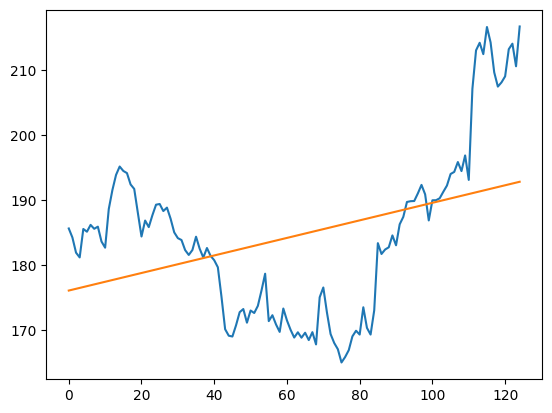

In [56]:
plt.plot(np.arange(len(prices)),prices)
plt.plot(np.arange(len(prices)), trendline)
plt.show()

In [57]:
# using moving average 

window =12
prices_ma = prices.rolling(window = window).mean()
detrended = prices - prices_ma

In [58]:
adf_test(detrended.dropna())

ADF Test Results:
ADF Statistic: -2.7899332754634156
p-value: 0.05972617823863487
Critical Values: {'1%': -3.489589552580676, '5%': -2.887477210140433, '10%': -2.580604145195395}
Fail to reject the null hypothesis (Data is non-stationary)




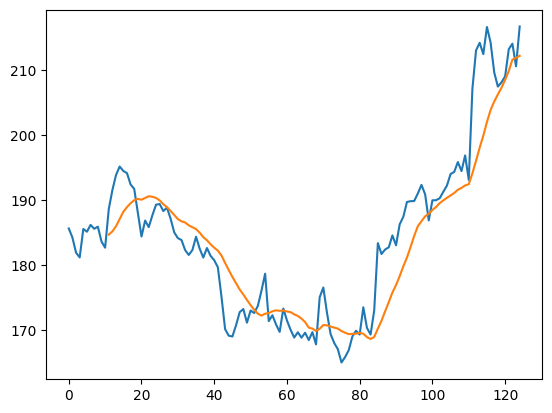

In [59]:
plt.plot(np.arange(len(prices)),prices)
plt.plot(np.arange(len(prices)),prices_ma)
plt.show()

In [60]:
# Seasonality adjustment 
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(prices, model='additive', period=30)
adjusted = prices / decomposition.seasonal

In [61]:
adf_test(adjusted.dropna())

ADF Test Results:
ADF Statistic: -4.600033130603772
p-value: 0.00012915147899696436
Critical Values: {'1%': -3.4901313156261384, '5%': -2.8877122815688776, '10%': -2.5807296460459184}
Reject the null hypothesis (Data is stationary)




### ACF and PACF 

In [62]:
# It is used to find the order of the model 

In [63]:
'''
MODEL                  ACF                       PACF

1. AR             Tails off/ decay           cuts at lag p
2. MA             cuts at lag q              Tails off/ decay
3. ARMA           Tails off/ decay           Tails off/ decay
'''

'\nMODEL                  ACF                       PACF\n\n1. AR             Tails off/ decay           cuts at lag p\n2. MA             cuts at lag q              Tails off/ decay\n3. ARMA           Tails off/ decay           Tails off/ decay\n'

In [64]:
difference = df1.dropna()

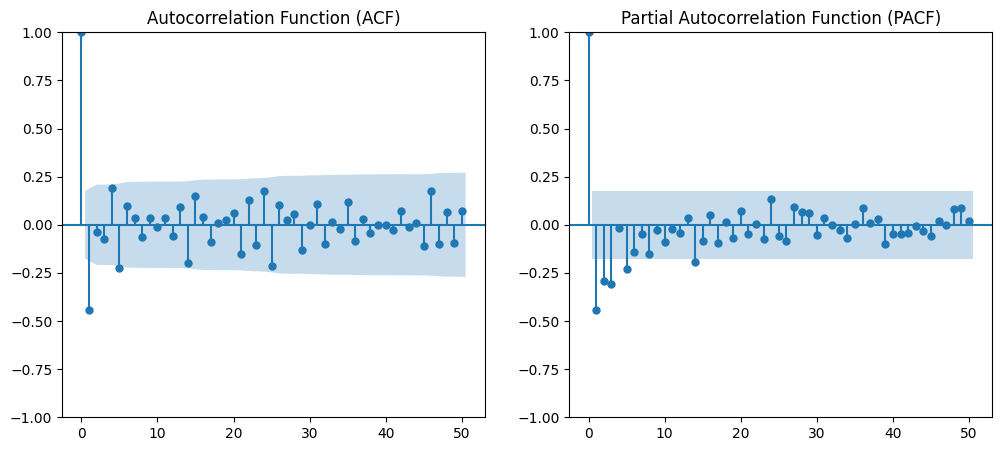

In [65]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  

# Plot ACF
plot_acf(stock_data['Close'].diff().diff().dropna(), lags=50, ax=axes[0])
axes[0].set_title("Autocorrelation Function (ACF)")

# Plot PACF
plot_pacf(stock_data['Close'].diff().diff().dropna(), lags=50, ax=axes[1])
axes[1].set_title("Partial Autocorrelation Function (PACF)")
# Show plots
plt.show()

### Time Series Forecasting Models 

In [67]:
# we made our time series data stationary using differencing 

In [68]:
difference = df1.dropna()

In [69]:
# splitting the data into training and testing datasets 

In [70]:
train_data, test_data  = difference[:-30], difference[-30:]

In [71]:
# AR (AutoRegressive Model)

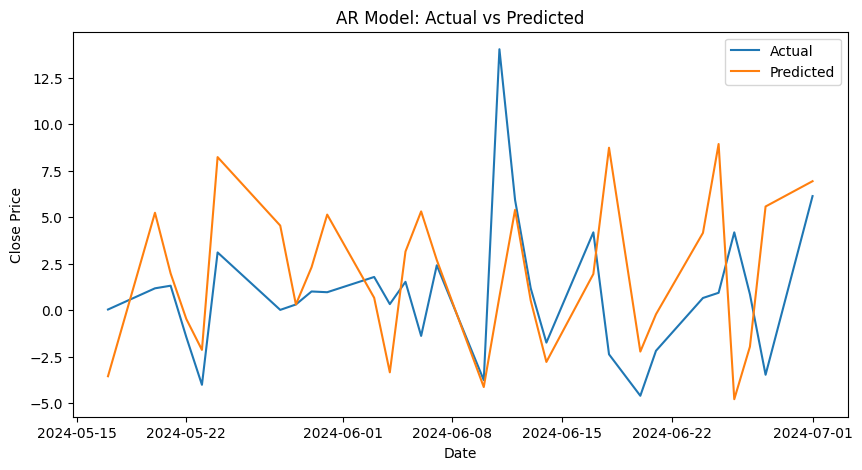

MAE (Mean Absolute Error): 3.5482
MSE (Mean Squared Error): 24.2332
RMSE (Root Mean Squared Error): 4.9227
AIC (Akaike Information Criterion): 339.2053
BIC (Bayesian Information Criterion): 408.2895


In [73]:
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_absolute_error, mean_squared_error

model = AutoReg(train_data, lags=30)
model_fit = model.fit()

predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic = False)

plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.title('AR Model: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluation Metrics
mae = mean_absolute_error(test_data, predictions)
mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)

# AIC & BIC
aic_value = model_fit.aic
bic_value = model_fit.bic

# Print Results
print(f'MAE (Mean Absolute Error): {mae:.4f}')
print(f'MSE (Mean Squared Error): {mse:.4f}')
print(f'RMSE (Root Mean Squared Error): {rmse:.4f}')
print(f'AIC (Akaike Information Criterion): {aic_value:.4f}')
print(f'BIC (Bayesian Information Criterion): {bic_value:.4f}')

In [74]:
# MA (Moving Average )

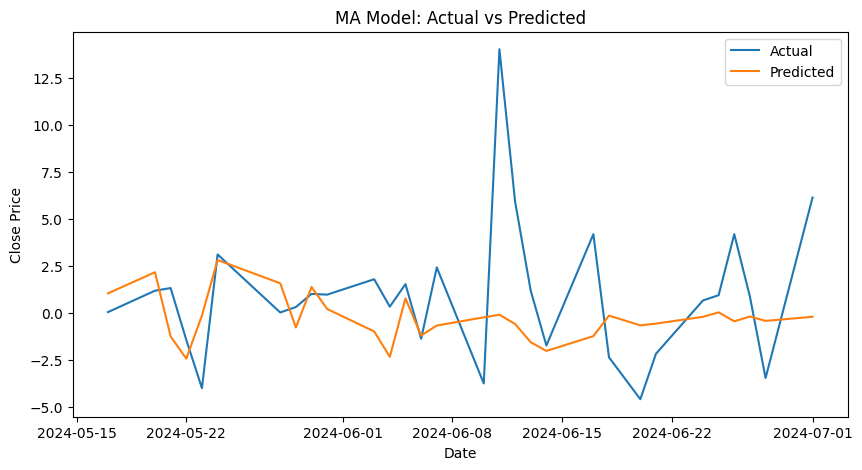

MAE (Mean Absolute Error): 2.6755
MSE (Mean Squared Error): 14.7617
RMSE (Root Mean Squared Error): 3.8421
AIC (Akaike Information Criterion): 479.3338
BIC (Bayesian Information Criterion): 560.7192


In [76]:
from statsmodels.tsa.arima.model import ARIMA

p,d,q = 0,0,30

model = ARIMA(train_data, order=(p,d,q))  
model_fit = model.fit()

predictions = model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic = False)

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted')
plt.title('MA Model: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluation Metrics
mae = mean_absolute_error(test_data, predictions)
mse = mean_squared_error(test_data, predictions)
rmse = np.sqrt(mse)

# AIC & BIC
aic_value = model_fit.aic
bic_value = model_fit.bic

# Print Results
print(f'MAE (Mean Absolute Error): {mae:.4f}')
print(f'MSE (Mean Squared Error): {mse:.4f}')
print(f'RMSE (Root Mean Squared Error): {rmse:.4f}')
print(f'AIC (Akaike Information Criterion): {aic_value:.4f}')
print(f'BIC (Bayesian Information Criterion): {bic_value:.4f}')

In [77]:
# ARMA (AutoRegressive Moving Average)

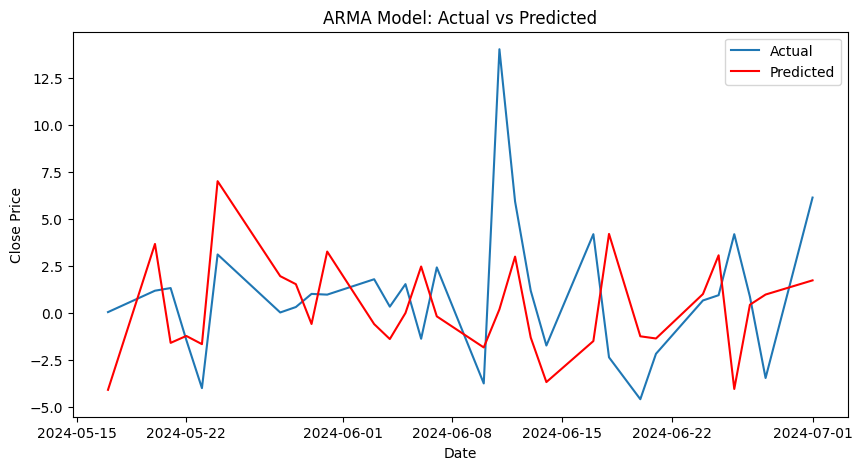

MAE (Mean Absolute Error): 3.1577
MSE (Mean Squared Error): 17.0674
RMSE (Root Mean Squared Error): 4.1313
AIC (Akaike Information Criterion): 517.6855
BIC (Bayesian Information Criterion): 675.3697


In [79]:
arma_model = ARIMA(train_data, order=(30, 0, 30))
arma_model_fit = arma_model.fit()

# Make predictions
arma_predictions = arma_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic =False)

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, arma_predictions, label='Predicted', color='red')
plt.title('ARMA Model: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluation Metrics
mae_arma = mean_absolute_error(test_data, arma_predictions)
mse_arma = mean_squared_error(test_data, arma_predictions)
rmse_arma = np.sqrt(mse_arma)

# AIC & BIC
aic_value = arma_model_fit.aic
bic_value = arma_model_fit.bic

# Print Results
print(f'MAE (Mean Absolute Error): {mae_arma:.4f}')
print(f'MSE (Mean Squared Error): {mse_arma:.4f}')
print(f'RMSE (Root Mean Squared Error): {rmse_arma:.4f}')
print(f'AIC (Akaike Information Criterion): {aic_value:.4f}')
print(f'BIC (Bayesian Information Criterion): {bic_value:.4f}')

In [80]:
# ARIMA (AutoRegressive Integrated Moving Average)

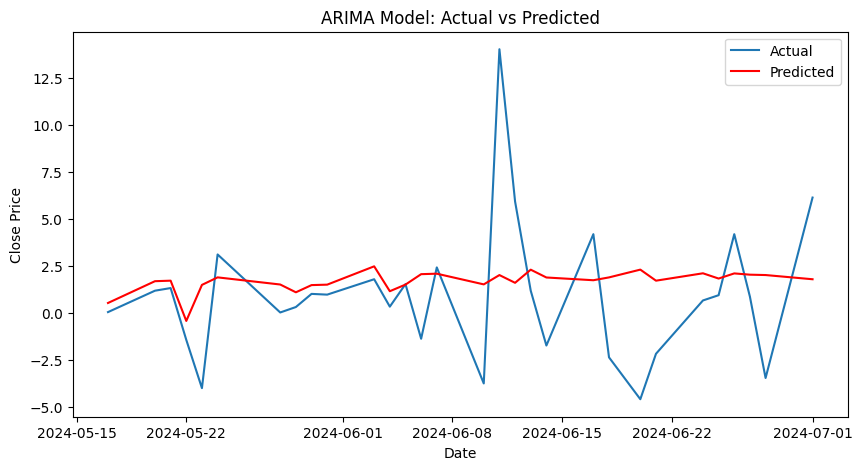

MAE (Mean Absolute Error): 2.5670
MSE (Mean Squared Error): 13.3338
RMSE (Root Mean Squared Error): 3.6516
AIC (Akaike Information Criterion): 457.0029
BIC (Bayesian Information Criterion): 494.9919


In [93]:
arima_model = ARIMA(train_data, order=(7, 1,7 ))
arima_model_fit = arima_model.fit()

# Make predictions
arima_predictions = arima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1, dynamic =False)

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, arima_predictions, label='Predicted', color='red')
plt.title('ARIMA Model: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluation Metrics
mae_arima = mean_absolute_error(test_data, arima_predictions)
mse_arima = mean_squared_error(test_data, arima_predictions)
rmse_arima = np.sqrt(mse_arima)

# AIC & BIC
aic_value = arima_model_fit.aic
bic_value = arima_model_fit.bic

# Print Results
print(f'MAE (Mean Absolute Error): {mae_arima:.4f}')
print(f'MSE (Mean Squared Error): {mse_arima:.4f}')
print(f'RMSE (Root Mean Squared Error): {rmse_arima:.4f}')
print(f'AIC (Akaike Information Criterion): {aic_value:.4f}')
print(f'BIC (Bayesian Information Criterion): {bic_value:.4f}')

In [83]:
# SARIMA (Seasonal AutoRegressive Integrated Moving Average)

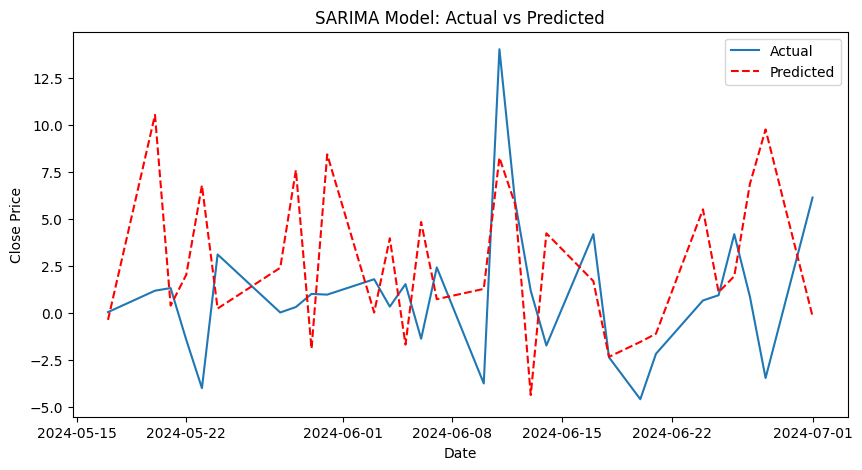

MAE (Mean Absolute Error): 4.2140
MSE (Mean Squared Error): 27.9713
RMSE (Root Mean Squared Error): 5.2888
AIC (Akaike Information Criterion): 333.6849
BIC (Bayesian Information Criterion): 451.5706


In [85]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

sarima_model = SARIMAX(train_data, order=(30, 1, 30), seasonal_order=(1, 1, 1, 45))
sarima_model_fit = sarima_model.fit()

predictions = sarima_model_fit.predict(start=len(train_data), end=len(train_data) + len(test_data) - 1)

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, predictions, label='Predicted', linestyle='dashed', color='red')
plt.title('SARIMA Model: Actual vs Predicted')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.show()

# Evaluation Metrics
mae_sarima = mean_absolute_error(test_data, predictions)
mse_sarima = mean_squared_error(test_data, predictions)
rmse_sarima = np.sqrt(mse_sarima)

# AIC & BIC
aic_value = sarima_model_fit.aic
bic_value = sarima_model_fit.bic

# Print Results
print(f'MAE (Mean Absolute Error): {mae_sarima:.4f}')
print(f'MSE (Mean Squared Error): {mse_sarima:.4f}')
print(f'RMSE (Root Mean Squared Error): {rmse_sarima:.4f}')
print(f'AIC (Akaike Information Criterion): {aic_value:.4f}')
print(f'BIC (Bayesian Information Criterion): {bic_value:.4f}')

#### Out of all the models ARIMA has performed best with low RMSE, AIC, BIC